In [1]:
# Standard 
import os, sys , copy ,shutil, logging, csv, json, logging
logger = logging.getLogger()
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
from streamm import values

import dask
from dask import delayed
# Import all the streamm modules
from streamm import *

%load_ext autoreload
%autoreload 2

In [2]:
local = resource.Resource('local')
local.load_json()
peregrine = resource.Resource('peregrine')
peregrine.load_json()

Reading in resource json file res_local.json 
Reading in resource json file res_peregrine.json 


In [3]:
peregrine.properties['queue'] = 'short'
peregrine.properties['walltime'] = 4
peregrine.properties['feature'] = '16core'
peregrine.properties['ppn'] = 16
peregrine.properties['nproc'] = 16

print peregrine.properties

{u'allocation': u'orgopv', u'scratch': u'/scratch/tkemper', u'ppn': 16, u'feature': '16core', u'queue': 'short', u'e-mail': u'travis.kemper@nrel.gov', u'exe_command': u'qsub ', u'nproc': 16, u'nodes': 1, u'pmem': 1500, u'walltime': 4}


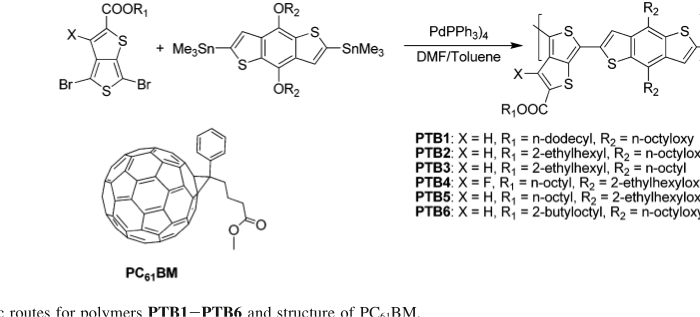

In [4]:
from IPython.display import Image
Image(filename=local.dir['home']+'/figures/PTBX.png')

In [5]:
name_l = []
name_l.append('BDT-TPD')
name_l.append('PTB1')
name_l.append('PTB5')
name_l.append('PTB4')
name_l.append('PTB7')
name_l.append('PCE10')

In [6]:
os.getcwd()

'/Users/tkemper/Projects/DApolymers/notebooks'

In [ ]:
proj_ref = 'res_et2'
proj_ref = project.Project('DAPpolymers_%s'%(proj_ref))
proj_ref.load_json()

In [ ]:
name_tag = {}
for tag,calc_i in proj_i.calculations.iteritems():
    t1 = tag.split('_prod1')
    calc_i.properties['struc_tag'] = t1[0]
    try:
        print calc_i.properties['struc_tag'],calc_i.properties['name']
        name_tag[calc_i.properties['struc_tag']] = calc_i.properties['name']
    except:
        print ''

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.properties['name'] = name_tag[calc_i.properties['struc_tag']] 

In [ ]:
for key in proj_ref.calculations.keys():
    print key

In [ ]:
for key in proj_ref.calculations.keys():
    print 'proj_ref.calculations[\''+key+'\'].meta[\'status\'] = \'ready\''
    

In [ ]:
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].meta['update'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4'].meta['update'] = 'ready'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2'].meta['update'] = 'finished'

In [7]:
proj_tag = 'mol_sp2'
proj_i = project.Project('DAPpolymers_%s'%(proj_tag))
proj_i.load_json()

Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
No references found 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
No references found 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
No references found 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
No references found 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 
Resource tag found peregrine 
Reading in resource json file res_peregrine.json 


In [ ]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'BDT-TPD'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB4'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB7'
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB5'
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB1'
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PCE10'


In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    print calc_i.tag,calc_i.meta['status']

In [ ]:
proj_ref.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'BDT-TPD'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'ready'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].properties['name'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2'].properties['name'] = 'ready'
proj_ref.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2'].properties['name'] = 'ready'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2'].properties['name'] = 'ready'

In [ ]:
def setup_calc(ref_i):
    os.chdir(ref_i.dir['launch'])
    calc_i = calculation.CalculationRes('%s_%s'%(ref_i.tag,proj_tag))
    calc_i.add_refcalc(ref_i)
    calc_i.set_resource(peregrine)
    calc_i.make_dir()
    calc_i.properties['scratch'] = calc_i.dir['scratch']
    calc_i.dir['templates'] = '/Users/tkemper/Development/streamm-tools/templates'
    calc_i.dir['scripts'] = '/Users/tkemper/Development/streamm-tools/scripts'

    os.chdir(calc_i.dir['launch'])
    
    shutil.copyfile(ref_i.dir['launch']+'/'+'DA.list',calc_i.dir['launch']+'/'+'DA.list')
    calc_i.files['input']['list_i'] = 'DA.list'
    cply_file = ref_i.files['input']['cply'] #"%s.cply"%(ref_i.tag)
    shutil.copyfile(ref_i.dir['launch']+'/'+cply_file,calc_i.dir['launch']+'/'+cply_file)
    calc_i.files['input']['cply'] = cply_file

    file_type = 'templates'
    file_key = 'run'
    file_name = "streamm_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_nwproj'
    file_name = "nwchem_peregrine.pbs"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_nw'
    file_name = "nwchem_sp.nw"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'templates'
    file_key = 't_run'
    file_name = "nwchem.sh"
    from_dirkey = 'templates'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'scripts'
    file_key = 'run_proj'
    file_name = "run_proj.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)
    
    file_type = 'scripts'
    file_key = 'py_script'
    file_name = "calc_groups.py"
    from_dirkey = 'scripts'
    to_dirkey = 'launch'
    calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

    calc_i.properties['streamm_command'] = 'python %s  %s --cply %s'%(calc_i.files['scripts']['py_script'],calc_i.tag,calc_i.files['input']['cply'])
    # calc_i.properties['streamm_command'] += ' --list_i %s '%(calc_i.files['input']['list_i'])
    calc_i.properties['streamm_command'] += ' --t_nw %s '%(calc_i.files['templates']['t_nw'])
    calc_i.properties['streamm_command'] += ' --t_run %s '%(calc_i.files['templates']['t_run']) 
    calc_i.properties['streamm_command'] += ' --jobs_node 10'
    calc_i.properties['streamm_command'] += ' --group_id mol '
    calc_i.properties['streamm_command'] += ' --hterm  '
    
    print calc_i.properties['streamm_command']    
    
    calc_i.load_str('templates','run')
    calc_i.replacewrite_prop('run','scripts','run','%s.pbs'%(calc_i.tag))
    
    file_type = 'output'
    file_key = 'log'
    file_name = "%s.log"%(calc_i.tag)
    calc_i.add_file(file_type,file_key,file_name)
    
    calc_i.properties['finish_str'] ='Finished'
    
    proj_i.calculations[calc_i.tag] = calc_i
    
    return calc_i

In [ ]:
for rtag, ref_i in proj_ref.calculations.iteritems():        
    if( ref_i.meta['update'] == 'ready' ):
        ref_i.check()
        ref_i.pull()

In [ ]:
proj_ref.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for rtag, ref_i in proj_ref.calculations.iteritems():        
    ref_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'



In [ ]:
for rtag, ref_i in proj_ref.calculations.iteritems():        
    if( ref_i.meta['update'] == 'ready' ):
        print rtag
        print ref_i.files['input']['cply']



In [ ]:
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].files['input']['cply'] = 'D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2.cply'
proj_ref.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3'].files['input']['cply'] = 'D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2.cply'
proj_ref.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3'].files['input']['cply'] = 'D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2.cply'



In [ ]:
for rtag, ref_i in proj_ref.calculations.iteritems():        
    if( ref_i.meta['update'] == 'ready' ):
        print '\n setup %s \n'%(rtag)
        #setup_calcs.append(delayed(setup_calc)(ref_i,proj_i))
        calc_i = setup_calc(ref_i)
        proj_i.calculations[calc_i.tag] = copy.deepcopy(calc_i)

    

In [ ]:
proj_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.dir['notebook'] = '/Users/tkemper/Projects/DApolymers/notebooks'

In [8]:
for tag,calc_i in proj_i.calculations.iteritems():
        os.chdir(calc_i.dir['launch'])
        print calc_i.tag,calc_i.meta['status']

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 stored
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 stored
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2 stored
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 stored
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 stored


In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])

        file_type = 'scripts'
        file_key = 'py_script'
        file_name = "calc_groups.py"
        from_dirkey = 'scripts'
        to_dirkey = 'launch'
        calc_i.cp_file(file_type,file_key,file_name,from_dirkey,to_dirkey)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        print tag

In [ ]:
#dask.compute(*setup_calcs)

In [ ]:
#dask_calcs = []
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        calc_i.push()

In [ ]:
#dask_calcs = []
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        calc_i.files['scripts'] = {}
        calc_i.files['scripts']['pbs'] = '%s.pbs'%(calc_i.tag)
        calc_i.run()

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    #calc_i.check()
    print calc_i.tag, calc_i.meta['status']
    #print calc_i.dir['scratch']
    bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
    os.system(bash)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    if( calc_i.meta['status'] == 'written'):
        os.chdir(calc_i.dir['launch'])
        print calc_i.dir['scratch']
        bash = 'ssh tkemper@peregrine.nrel.gov \'  cd %s ;  qsub %s.pbs \' '%(calc_i.dir['scratch'],calc_i.tag)
        print bash
        #bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
        os.system(bash)

In [ ]:
for tag,ref_i in proj_ref.calculations.iteritems():
    os.chdir(ref_i.dir['notebook'])
    ref_i.dump_json()
os.chdir(proj_ref.dir['notebook'])
proj_ref.dump_json()    



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.check()
    print tag,calc_i.meta['status']



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    #calc_i.check()
    print calc_i.tag, calc_i.meta['status']
    #print calc_i.dir['scratch']
    bash = "scp /Users/tkemper/Development/streamm-tools/scripts/calc_groups.py tkemper@peregrine.nrel.gov:%s"%(calc_i.dir['scratch'])
    os.system(bash)

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.meta['status'] = 'written'
    calc_i.run()



In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.files['output']['mol_en'] = 'mol_en.csv'
    calc_i.files['data']['mol_cplys'] = 'mol*.cply'
    calc_i.files['data']['mol_logs'] = 'scratch/*/*log'

In [ ]:
print calc_i.files['output']

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.files['output']['group_mol'] = 'group_mol.csv'
    print calc_i.files['output']

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.check()
    print calc_i.tag, calc_i.meta['status']

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.meta['status'] = 'finished'
    calc_i.store(file_type_list=['output'])

In [ ]:
for tag,calc_i in proj_i.calculations.iteritems():
    calc_i.pull(file_type_list=['output'])

In [ ]:
print  proj_i.calculations.keys()

In [ ]:
proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'BDT-TPD'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB4'
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB7'
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB1'
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PTB5'
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].properties['name'] = 'PCE10'

In [9]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print 'proj_i.calculations[\''+tag_i+'\'].meta[\'use\'] = True '
    calc_i.meta['use'] = False 
    #print calc_i.properties['update']

proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2'].meta['use'] = True 



proj_i.calculations['D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_p

In [ ]:

proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2'].meta['use'] = True 
proj_i.calculations['D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 



proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 
proj_i.calculations['D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2'].meta['use'] = True 



In [11]:
for tag_i,calc_i in proj_i.calculations.iteritems():
    print tag_i,calc_i.properties['name']


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2 BDT-TPD
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PCE10
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB7
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB5
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2 PCE10
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB1
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 PCE10
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB7


In [13]:
#def plot_en(key_i):
key_i = 'total'
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    molts_df = pd.read_csv(calc_i.files['output']['mol_en'])    
    x_mean = molts_df[key_i].mean()
    val_i = values.Values(key_i,molts_df[key_i].apply(lambda x: units.convert_H_eV(x-x_mean) ))    
    val_i.calc_stats()
    val_i.set_bins(0.25)
    val_i.calc_hist()
    calc_i.molen_total = copy.deepcopy(val_i) 

In [14]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')

D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2 PCE10


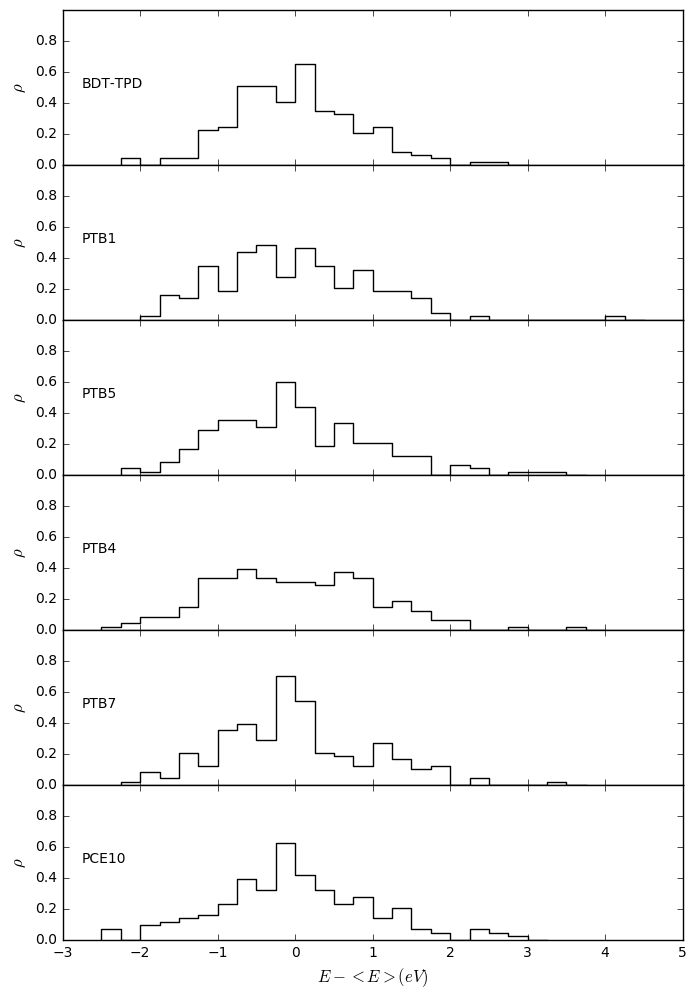

In [15]:
fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i
    #fig, ax = plt.subplots(1)
    val_i = calc_i.molen_total
    name_i = calc_i.properties['name']
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    #ax[i].set_xlabel(r'$R^2$ ($\AA^2$)',fontsize=12)
    #ax[i].set_xlabel(r'$l^2$ ($\AA^2$)',fontsize=12)
    ax[i].set_xlabel(r'$E - <E>(eV) $',fontsize=12)
    ax[i].set_ylabel(r'$\rho$',fontsize=12)
    ax[i].set_xlim(-3,5)
    ax[i].set_ylim(0.0,1.0)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,6.0)
    ax[i].text(-2.75,0.50,name_i)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    


    i+=1

#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("mol_%s_hist.pdf"%(key_i),format='pdf')




In [16]:
key_i  = 'HOMO'

for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    molts_df = pd.read_csv(calc_i.files['output']['mol_en'])    
    x_mean = molts_df[key_i].mean()
    val_i = values.Values(key_i,molts_df[key_i].apply(lambda x: units.convert_H_eV(x) ))    
    val_i.calc_stats()
    val_i.set_bins(0.05)
    val_i.calc_hist()
    calc_i.molen_homo = copy.deepcopy(val_i) 
    print calc_i.molen_homo.mean




-6.85382370113
-6.32698110994
-6.35930984023
-6.46748703609
-6.14770803853
-6.32698110994
-6.24119405628
-6.32709648787
-6.35930984023
-6.46748703609


D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2 BDT-TPD
D1_R2R200_A31_R4_n1_R40n1R40n1R42n1__n5_x173_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB1
D1_R2R200_A31_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_mol_sp2 PTB5
D1_R2R200_A23_R4_n1_R41n1R41n1R40n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB4
D1_R2R200_A23_R4_n1_R41n1R41n1R41n1__n5_x193_prod1_min2_grp1_remin1_res_et2_res_et3_mol_sp2 PTB7
D51_00R300R3_A23_R4__n1wB_R41n1wBR41n1wBR41n1wB__n5_x173_prod1_min2_grp1_remin1_res_et4_mol_sp2 PCE10


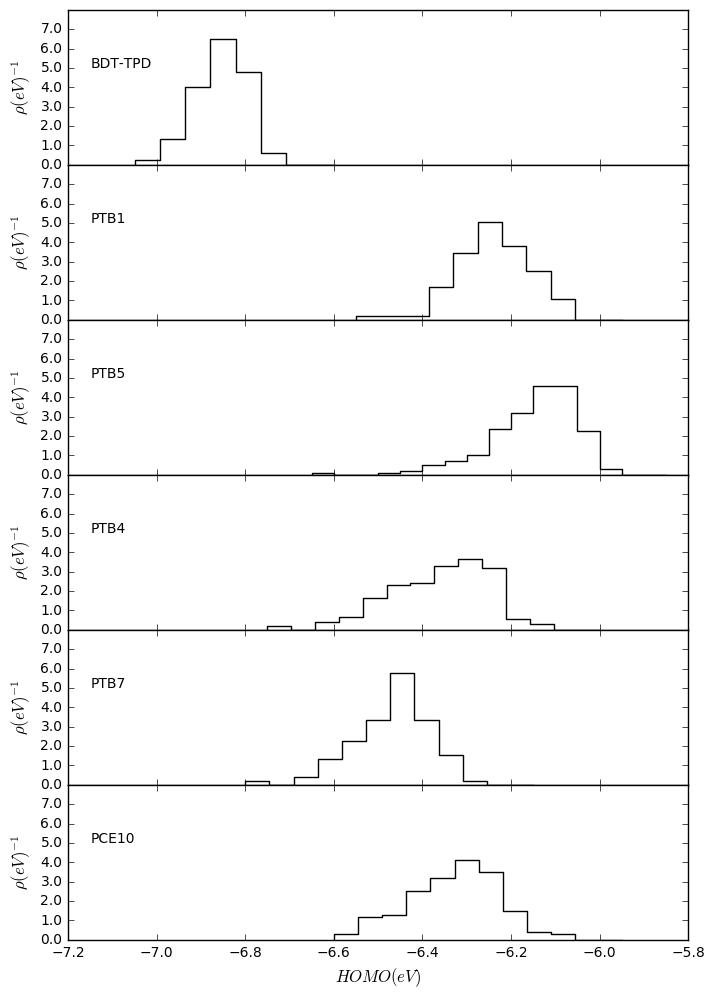

In [17]:
os.chdir('/Users/tkemper/Projects/DApolymers/figures')
fig, ax = plt.subplots(6,sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i in name_l:
    
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i
    #fig, ax = plt.subplots(1)
    val_i = calc_i.molen_homo
    name_i = calc_i.properties['name']
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    ax[i].set_xlabel(r'$HOMO(eV) $',fontsize=12)
    ax[i].set_ylabel(r'$\rho(eV)^{-1}$',fontsize=12)
    ax[i].set_xlim(-7.2,-5.8)
    ax[i].set_ylim(0.0,8.0)
    ax[i].text(-7.15,5.0,name_i)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)
    i+=1

#i += -1
fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)
fig.savefig("mol_%s_hist.pdf"%(key_i),format='pdf')

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')

In [ ]:
table_lines = ' Polymer & $<HOMO>$ & $\sigma(HOMO)$ \n'
for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i
    val_i = calc_i.molen_total
    name_i = calc_i.properties['name']

    table_lines += '%s '%(name_i) #calc_i.tag)
    table_lines += '& %8.2f & %8.2e '%(calc_i.molen_homo.mean,calc_i.molen_homo.std)
    table_lines += '\\\\ \n'


print table_lines
    
f = open('molHOMO.tex','w')
f.write(table_lines)
f.close()    
    

In [ ]:
table_lines = ' Polymer & $<HOMO>$ & $\sigma(HOMO)$ \n'
#for name_i in name_l:
for tag_i,calc_i in proj_i.calculations.iteritems():
    val_i = calc_i.molen_total
    name_i = calc_i.properties['name']
    table_lines += '%s \n'%(calc_i.tag)
    table_lines += '& %8.2f & %8.2e '%(calc_i.molen_homo.mean,calc_i.molen_homo.std)
    table_lines += '\\\\ \n'


print table_lines
    
f = open('molHOMO_all.tex','w')
f.write(table_lines)
f.close()    
    

In [ ]:
d_HOMO = dict()
d_HOMO['name'] = []
d_HOMO['Molen'] = []
d_HOMO['Molstd'] = []

for name_i in name_l:
    for tag_i,calc_o in proj_i.calculations.iteritems():
        if( calc_o.properties['name'] == name_i and calc_o.meta['use'] ):
            calc_i = calc_o

    print  calc_i.tag  ,name_i
    d_HOMO['name'].append(name_i)
    d_HOMO['Molen'].append(val_i.mean)
    d_HOMO['Molstd'].append(val_i.std)

    
mol_HOMO = pd.DataFrame(d_HOMO)

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/materials')

In [ ]:
res_HOMO = pd.read_csv('res_HOMO.csv')

In [ ]:
print res_HOMO

In [ ]:
HOMOs = pd.merge(mol_HOMO,res_HOMO,on=['name'])

In [ ]:
print HOMOs


In [ ]:
t_line  ="Name & $<HOMO_{mol}>$  & \sigma HOMO_{mol} & $<HOMO_{D}>$ & \sigma HOMO_{D} & $<HOMO_{A}>$ & \sigma HOMO_{A} \hline \n"
for i in  HOMOs.index:
    t_line += " %s & %6.2f & %6.2f"%(HOMOs.iloc[i]['name'],HOMOs.iloc[i]['Molen'],HOMOs.iloc[i]['Molstd'])
    t_line += " & %6.2f & %6.2f  "%(HOMOs.iloc[i]['Den'],HOMOs.iloc[i]['Dstd'])
    t_line += " & %6.2f & %6.2f  "%(HOMOs.iloc[i]['Aen'],HOMOs.iloc[i]['Astd'])    
    t_line += "\\\\  \n" #%(HOMOs.iloc[i]['Aen']+(HOMOs.iloc[i]['Den']-HOMOs.iloc[i]['Aen'])/2.0 )

In [ ]:
print t_line

In [ ]:
os.chdir('/Users/tkemper/Projects/DApolymers/tables')

In [ ]:
f = open('HOMO.tex','w')
f.write(t_line)
f.close()

In [ ]:
key_i  = 'LUMO'

val_dic = {}
for tag_i,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['launch'])
    molts_df = pd.read_csv(calc_i.files['output']['mol_en'])    
    x_mean = molts_df[key_i].mean()
    val_i = values.Values(key_i,molts_df[key_i].apply(lambda x: units.convert_H_eV(x) ))    
    val_i.calc_stats()
    val_i.set_bins(0.05)
    val_i.calc_hist()
    val_dic[calc_i.properties['name']] = copy.deepcopy(val_i) 



os.chdir('/Users/tkemper/Projects/DApolymers/figures')

fig, ax = plt.subplots(len(val_dic),sharex=True)
#ax.plot(rgy_sq_vals.bin_val,rgy_sq_vals.hist_bin)
#ax.bar(rgy_sq_vals.bins_cent, rgy_sq_vals.hist_cent , align='center', width=rgy_sq_vals.bin_size)
i = 0
for name_i,val_i in val_dic.iteritems():
    #fig, ax = plt.subplots(1)
    ax[i].plot(val_i.bins_steps,val_i.hist_steps,'k-',ls = "steps")
    #ax[i].set_xlabel(r'$R^2$ ($\AA^2$)',fontsize=12)
    #ax[i].set_xlabel(r'$l^2$ ($\AA^2$)',fontsize=12)
    ax[i].set_xlabel(r'$LUMO(eV) $',fontsize=12)
    ax[i].set_ylabel(r'$\rho$',fontsize=12)
    ax[i].set_xlim(-0.8,0.8)
    ax[i].set_ylim(0.0,8.0)
    #ax[i].text(55,0.015,name_i)
    #ax[i].set_xlim(0,1.0)
    #ax[i].set_ylim(0.0,6.0)
    ax[i].text(0.5,5.0,name_i)

    labels=ax[i].get_yticks().tolist()
    labels[-1]=''
    ax[i].set_yticklabels(labels)    

    
    i+=1
    
#i += -1

fig.subplots_adjust(hspace=0.0)   
fig.set_size_inches(8.0, 12.0)

fig.savefig("mol_%s_hist.pdf"%(key_i),format='pdf')




In [19]:
print proj_i.dir['notebook']

/Users/tkemper/Projects/DApolymers/notebooks


In [18]:
for tag,calc_i in proj_i.calculations.iteritems():
    os.chdir(calc_i.dir['notebook'])
    calc_i.dump_json()
os.chdir(proj_i.dir['notebook'])
proj_i.dump_json()    


{'files': {u'templates': {u't_nwproj': u'nwchem_peregrine.pbs', u'run': u'streamm_peregrine.pbs', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2_templates.tgz', u't_nw': u'nwchem_sp.nw', u't_run': u'nwchem.sh'}, u'input': {u'cply': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2.cply', u'list_i': u'DA.list', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2_input.tgz'}, u'scripts': {u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2_scripts.tgz', u'pbs': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2.pbs'}, u'data': {u'mol_cplys': u'mol*.cply', u'compressed': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_grp1_remin1_res_et2_mol_sp2_data.tgz', u'mol_logs': u'scratch/*/*log'}, u'output': {u'group_mol': u'group_mol.csv', u'mol_en': u'mol_en.csv', u'log': u'D1_R2R200_A2_R3_R200R200R201_n5_x197_prod1_min2_